<a href="https://colab.research.google.com/github/yogeshtak/Machine_Learning/blob/master/Machine_Learning_1_Classifiers_(Udacity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Gaussian NB**
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


In [0]:
import numpy as np

In [0]:
x = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([1,1,1,2,2,2])

In [0]:
from sklearn.naive_bayes import GaussianNB

In [43]:
clf = GaussianNB()
clf.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
print(clf.predict([[-0.8,-1]]))

[1]


**Accuracy** -- no. of points classified correctly/all points (in test data)

In [0]:
a = np.array([[-1,-2]])
b = np.array([1])
accuracy = clf.score(a,b)

In [46]:
accuracy

1.0

In [0]:
import nltk
import numpy
import scipy
import sklearn

In [0]:
import tarfile
import os
tfile = tarfile.open("/content/drive/My Drive/Colab Notebooks/Data/enron_mail_20150507.tar.gz")
tfile.extractall(".")

In [0]:
import sys
from time import time


In [0]:
import pickle
import _pickle as cPickle
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

In [0]:
def preprocess(words_file = "/content/drive/My Drive/Colab Notebooks/Udacity/tools/word_data.pkl", authors_file="/content/drive/My Drive/Colab Notebooks/Udacity/tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features
        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions
        4 objects are returned:
            -- training/testing features
            -- training/testing labels
    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=1)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print("no. of Chris training emails:", sum(labels_train))
    print("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test

In [93]:
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [53]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
t0 = time()
clf.fit(features_train,labels_train)
print("training time:", round(time()-t0, 3), "s")

training time: 1.478 s


In [0]:
accuracy = clf.score(features_test,labels_test)

In [55]:
accuracy

0.9732650739476678

In [56]:
t1 = time()
clf.predict(features_test)
print("predicting time:", round(time()-t1, 3), "s")

predicting time: 0.1 s


### **Support Vector Machine (SVM)**

In [57]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
clf.predict([[2., 2.]])

array([1])

**Using the same email dataset for SVM, so that we can compare the accuracy with Naive Bayes**

In [59]:
 clf = svm.SVC(kernel="linear")
 t0 = time()
 clf.fit(features_train,labels_train)
 print("training time:", round(time()-t0, 3), "s")

training time: 256.56 s


In [60]:
t1 = time()
clf.predict(features_test)
print("Prediction time:", round(time()-t1,3),"s")

Prediction time: 26.449 s


In [0]:
accuracy = clf.score(features_test,labels_test)

In [62]:
accuracy

0.9840728100113766

**Accuracy is pretty good but in general, the SVM is MUCH slower to train and use for predicting.**

One way to speed up an algorithm is to train it on a smaller training dataset. The tradeoff is that the accuracy almost always goes down when you do this. Let’s explore this more concretely: 

In [0]:
features_train_min = features_train[:len(features_train)//100]
labels_train_min = labels_train[:len(labels_train)//100]

These lines effectively slice the training dataset down to 1% of its original size, tossing out 99% of the training data. You can leave all other code unchanged. What’s the accuracy now?

In [64]:
clf = svm.SVC(kernel="linear")
t0 = time()
clf.fit(features_train_min,labels_train_min)
print("training time:", round(time()-t0, 3),"s")


training time: 0.137 s


In [0]:
accuracy = clf.score(features_test,labels_test)

In [67]:
accuracy

0.8845278725824801

**Now our model trained at faster spped but accuracy has gone down because we used just a little bit of test dataset**

**Only 1% of the features, but over 88% the performance?  Not too shabby!**



In [68]:
clf = svm.SVC(kernel="rbf")
t0 = time()
clf.fit(features_train_min,labels_train_min)
print("training time:", round(time()-t0,3),"s")

training time: 0.157 s


In [69]:
accuracy = clf.score(features_test,labels_test)
accuracy

from sklearn.metrics import accuracy_score
s1 = accuracy_score(labels_test,clf.predict(features_test))
s1

0.8953356086461889

In [70]:
s1

0.8953356086461889

In [71]:
accuracy

0.8953356086461889

In [72]:
clf = svm.SVC(C=10.0, kernel="rbf")
t0 = time()
clf.fit(features_train_min,labels_train_min)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
accuracy

training time: 0.152 s


0.8998862343572241

In [73]:
clf1 = svm.SVC(kernel="rbf", C=100)
t0 = time()
clf1.fit(features_train_min,labels_train_min)
print("training time:", round(time()-t0,3),"s")

accuracy = clf1.score(features_test,labels_test)
accuracy

training time: 0.15 s


0.8998862343572241

In [74]:
clf = svm.SVC(kernel="rbf", C=1000)
t0 = time()
clf.fit(features_train_min,labels_train_min)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
accuracy

training time: 0.151 s


0.8998862343572241

In [75]:
clf = svm.SVC(kernel="rbf", C=10000)
t0 = time()
clf.fit(features_train_min,labels_train_min)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
accuracy

training time: 0.149 s


0.8998862343572241

In [76]:
clf = svm.SVC(kernel="rbf",C=10000)
t0 = time()
clf.fit(features_train,labels_train)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)

training time: 257.07 s


In [77]:
accuracy

0.9960182025028441

In [0]:
predictions = clf.predict(features_test)

0 or 1 corresponds to mail written by SARA and CHRIS respectively

In [79]:
predictions[10]

1

In [80]:
predictions[26]

0

In [81]:
predictions[50]

1

In [82]:
predictions

array([0, 0, 1, ..., 1, 0, 0])

In [83]:
unique_elements, count_elements = np.unique(predictions, return_counts=True)
print(np.asarray((unique_elements, count_elements)))

[[  0   1]
 [892 866]]


In [0]:
import math

In [85]:
ent = (-2/3)*math.log(2/3,2)-(1/3)*math.log(1/3,2)
ent

0.9182958340544896

In [86]:
ig = 1-((3/4)*ent)
ig

0.31127812445913283

In [87]:
ent = (-1/2)*math.log(1/2,2)-(1/2)*math.log(1/2,2)
ent

1.0

### **Decision Tree Classifier**

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split =40)
clf = clf.fit(features_train,labels_train)

In [89]:
accuracy = clf.score(features_test,labels_test)
accuracy

0.9789533560864618

In [90]:
len(features_train[0])

3785

In [91]:
features_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
len(features_train[0])

379

In [95]:
# using only 1% of available features (i.e percentile = 1)
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train,labels_train)
accuracy = clf.score(features_test,labels_test)
accuracy

0.9664391353811149

# Choosing my own Algorithm

## 1. KNN (K nearest Neighbor)

In [0]:
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [0]:
import matplotlib.pyplot as plt
import pylab as pl

In [0]:
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start+json.dumps(data)+image_end)

In [0]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [0]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

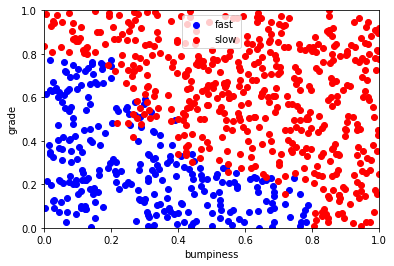

In [102]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
clf = KNeighborsClassifier()
t0 = time()
clf = clf.fit(features_train,labels_train)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
accuracy

training time: 0.017 s


0.92

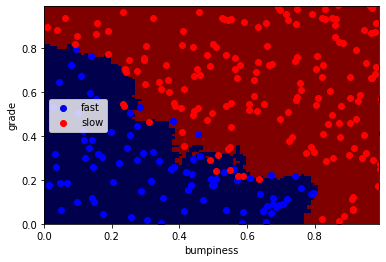

In [105]:
prettyPicture(clf,features_test,labels_test)

In [106]:
clf = KNeighborsClassifier(n_neighbors=1)
t0 = time()
clf = clf.fit(features_train,labels_train)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
accuracy

training time: 0.003 s


0.94

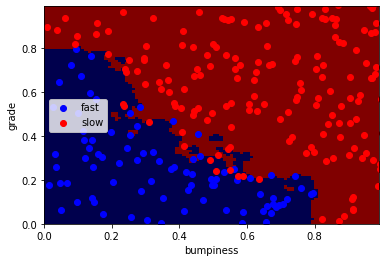

In [107]:
prettyPicture(clf,features_test,labels_test)

training time: 0.003 s
accuracy is 0.94


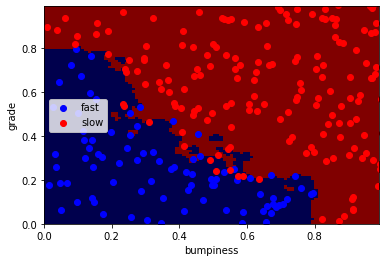

In [108]:
clf = KNeighborsClassifier(n_neighbors=1, weights="distance")
t0 = time()
clf = clf.fit(features_train,labels_train)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
print("accuracy is", accuracy)
prettyPicture(clf,features_test,labels_test)

In [111]:
accuracy1 = []
for i in range (1,20):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf = clf.fit(features_train,labels_train)
  accuracy = clf.score(features_test,labels_test)
  accuracy1.append(accuracy)
  print("for n_neighbors: ",i, "---> Accuracy Score is: ",accuracy)
  

for n_neighbors:  1 ---> Accuracy Score is:  0.94
for n_neighbors:  2 ---> Accuracy Score is:  0.928
for n_neighbors:  3 ---> Accuracy Score is:  0.936
for n_neighbors:  4 ---> Accuracy Score is:  0.94
for n_neighbors:  5 ---> Accuracy Score is:  0.92
for n_neighbors:  6 ---> Accuracy Score is:  0.936
for n_neighbors:  7 ---> Accuracy Score is:  0.936
for n_neighbors:  8 ---> Accuracy Score is:  0.944
for n_neighbors:  9 ---> Accuracy Score is:  0.936
for n_neighbors:  10 ---> Accuracy Score is:  0.932
for n_neighbors:  11 ---> Accuracy Score is:  0.932
for n_neighbors:  12 ---> Accuracy Score is:  0.932
for n_neighbors:  13 ---> Accuracy Score is:  0.936
for n_neighbors:  14 ---> Accuracy Score is:  0.928
for n_neighbors:  15 ---> Accuracy Score is:  0.928
for n_neighbors:  16 ---> Accuracy Score is:  0.94
for n_neighbors:  17 ---> Accuracy Score is:  0.928
for n_neighbors:  18 ---> Accuracy Score is:  0.94
for n_neighbors:  19 ---> Accuracy Score is:  0.928


In [112]:
accuracy1

[0.94,
 0.928,
 0.936,
 0.94,
 0.92,
 0.936,
 0.936,
 0.944,
 0.936,
 0.932,
 0.932,
 0.932,
 0.936,
 0.928,
 0.928,
 0.94,
 0.928,
 0.94,
 0.928]

Text(0, 0.5, 'Accuracy')

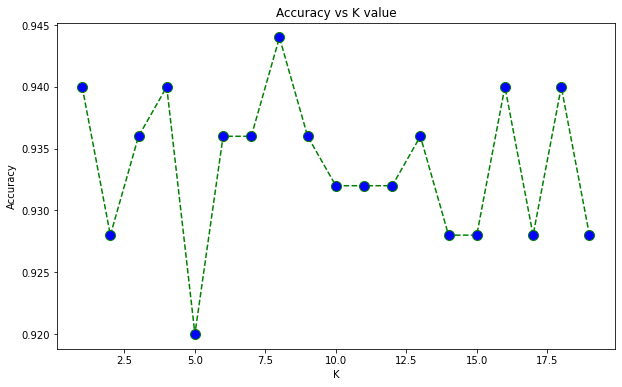

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy1,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Accuracy vs K value")
plt.xlabel("K")
plt.ylabel("Accuracy")


training time: 0.003 s
accuracy is 0.94


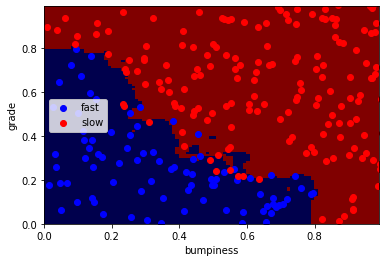

In [114]:
clf = KNeighborsClassifier(n_neighbors=4, weights="distance")
t0 = time()
clf = clf.fit(features_train,labels_train)
print("training time:", round(time()-t0,3),"s")

accuracy = clf.score(features_test,labels_test)
print("accuracy is", accuracy)
prettyPicture(clf,features_test,labels_test)

## 2. Random Forest